In [7]:
import scanpy as sc
import pandas as pd

X = pd.read_csv(
    "../brown_human_spleen/GSM4085512_human_spleen_raw_counts.tsv.gz",
    sep="\t",
    index_col=0,
)
obs = pd.DataFrame(index=X.index)
var = pd.DataFrame(index=X.columns)
meta = pd.read_csv(
    "../brown_human_spleen/GSE137710_human_spleen_cell_metadata_4465x9.tsv.gz",
    sep="\t",
    index_col=0,
)
meta.index = meta.index.astype(str)

In [8]:
from scipy.sparse import csr_matrix

X = csr_matrix(X.values)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10299143 stored elements and shape (5110, 16328)>

In [9]:
adata = sc.AnnData(X=X, obs=obs, var=var)
adata.layers["counts"] = adata.X.copy()
for col in meta:
    adata.obs[col] = meta[col]
adata

/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5110 × 16328
    obs: 'tissue', 'background', 'total_counts', 'mitochondrial_fraction', 'cell_type', 'cluster', 'tsne_x', 'tsne_y'
    layers: 'counts'

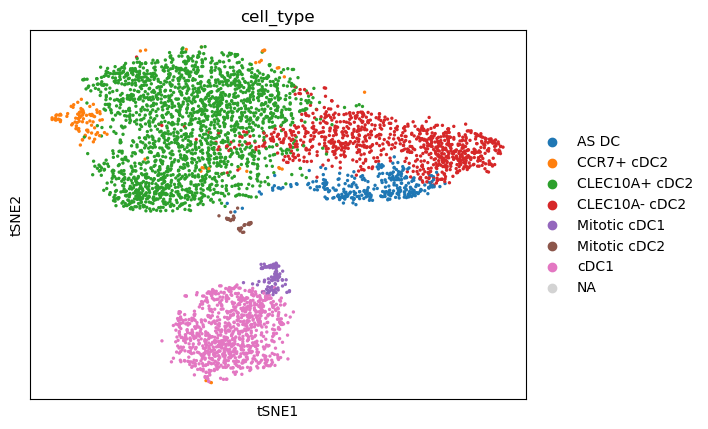

In [10]:
adata.obsm["X_tsne"] = adata.obs[["tsne_x", "tsne_y"]].values
sc.pl.tsne(adata, color=["cell_type"])

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata.copy()

In [12]:
adata.write("brown_GSE137710.h5ad", compression="gzip")

In [13]:
adata.var

""
TSPAN6
DPM1
SCYL3
C1ORF112
FGR
...
RP11-57A19.7
RP11-419I17.1
RP3-454G6.2
AC013271.5
